# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão**


No módulo 17, vocês realizaram a primeira etapa do projeto de crédito de vocês. Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste. Já no módulo 14, aplicaram a base já tratada o algoritmo de Naive Bayes, onde avaliaram os resultados das previsões. Nesse módulo aplicaremos a nossa base o algoritmo da árvore de decisão.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [11]:
df = pd.read_csv(r"C:\Users\Léo\Downloads\ciencia de dados\modulo 21\CREDIT_SCORE_M21.csv")

df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score,Credit Score Num
0,25.0,Female,50000.0,Bachelor's Degree,Single,0,Rented,High,800
1,30.0,Male,100000.0,Master's Degree,Married,2,Owned,High,800
2,35.0,Female,75000.0,Doctorate,Married,1,Owned,High,800
3,40.0,Male,125000.0,High School Diploma,Single,0,Owned,High,800
4,45.0,Female,100000.0,Bachelor's Degree,Married,3,Owned,High,800
5,50.0,Male,150000.0,Master's Degree,Married,0,Owned,High,800
6,26.0,Female,40000.0,Associate's Degree,Single,0,Rented,Average,650
7,31.0,Male,60000.0,Bachelor's Degree,Single,0,Rented,Average,650
8,NaN,Female,80000.0,Master's Degree,Married,2,Owned,High,800
9,NaN,Male,105000.0,Doctorate,Single,0,Owned,High,800


# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [12]:
X = df.drop(columns=["Credit Score", "Credit Score Num"])
y = df["Credit Score"]

# Separação em treino (70%) e teste (30%) - com estratificação para manter proporções
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Verificar dimensões das bases
print("Dimensões das bases:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

# Verificar balanceamento de y no teste
print("\nBalanceamento do y_test:")
print(y_test.value_counts(normalize=True))

Dimensões das bases:
X_train: (114, 7)
y_train: (114,)
X_test: (50, 7)
y_test: (50,)

Balanceamento do y_test:
Credit Score
High       0.68
Average    0.22
Low        0.10
Name: proportion, dtype: float64


# 2) Explique com suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo.

    Preparar os dados

Separar X (variáveis explicativas) e y (variável alvo).

Dividir em treino e teste para avaliar depois.

    Tratar os dados

Corrigir valores nulos (ex.: idade faltante).

Transformar variáveis categóricas em numéricas (One-Hot Encoder).

    Treinar a árvore

Criar o modelo: DecisionTreeClassifier().

Ajustar com os dados de treino: fit(X_train, y_train).

    Fazer previsões

Usar predict(X_test) para prever no conjunto de teste.

    Avaliar o modelo

Calcular métricas como accuracy, precisão, recall, F1-score.

Gerar matriz de confusão para ver acertos e erros.

    Melhorar o modelo

Ajustar parâmetros da árvore (max_depth, min_samples_leaf, etc.).

Usar técnicas de balanceamento se as classes estiverem desproporcionais.

Testar modelos mais fortes (Random Forest, Gradient Boosting).

# 3) Aplique o algortimo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.
Traga a acurácia para o modedlo com os dados de treino.

In [13]:
num_cols = ["Age", "Income", "Number of Children"]
cat_cols = ["Gender", "Education", "Marital Status", "Home Ownership"]

# Pré-processamento: imputação + codificação
num_prep = Pipeline([("imputer", SimpleImputer(strategy="median"))])
cat_prep = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer([
    ("num", num_prep, num_cols),
    ("cat", cat_prep, cat_cols)
])

clf = DecisionTreeClassifier(criterion="gini", random_state=0)

pipe = Pipeline([
    ("prep", preprocess),
    ("clf", clf)
])

pipe.fit(X_train, y_train)

y_pred_train = pipe.predict(X_train)

acc_train = accuracy_score(y_train, y_pred_train)
acc_train

1.0

# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [14]:
y_pred_test = pipe.predict(X_test)

acc_test = accuracy_score(y_test, y_pred_test)

report_test = classification_report(y_test, y_pred_test)
cm_test = confusion_matrix(y_test, y_pred_test)

acc_test, report_test, cm_test

(1.0,
 '              precision    recall  f1-score   support\n\n     Average       1.00      1.00      1.00        11\n        High       1.00      1.00      1.00        34\n         Low       1.00      1.00      1.00         5\n\n    accuracy                           1.00        50\n   macro avg       1.00      1.00      1.00        50\nweighted avg       1.00      1.00      1.00        50\n',
 array([[11,  0,  0],
        [ 0, 34,  0],
        [ 0,  0,  5]]))

# 5) Plote a árvore de decisão.
É possível fazer uma avaliação visual? Qual a profundidade da árvore?

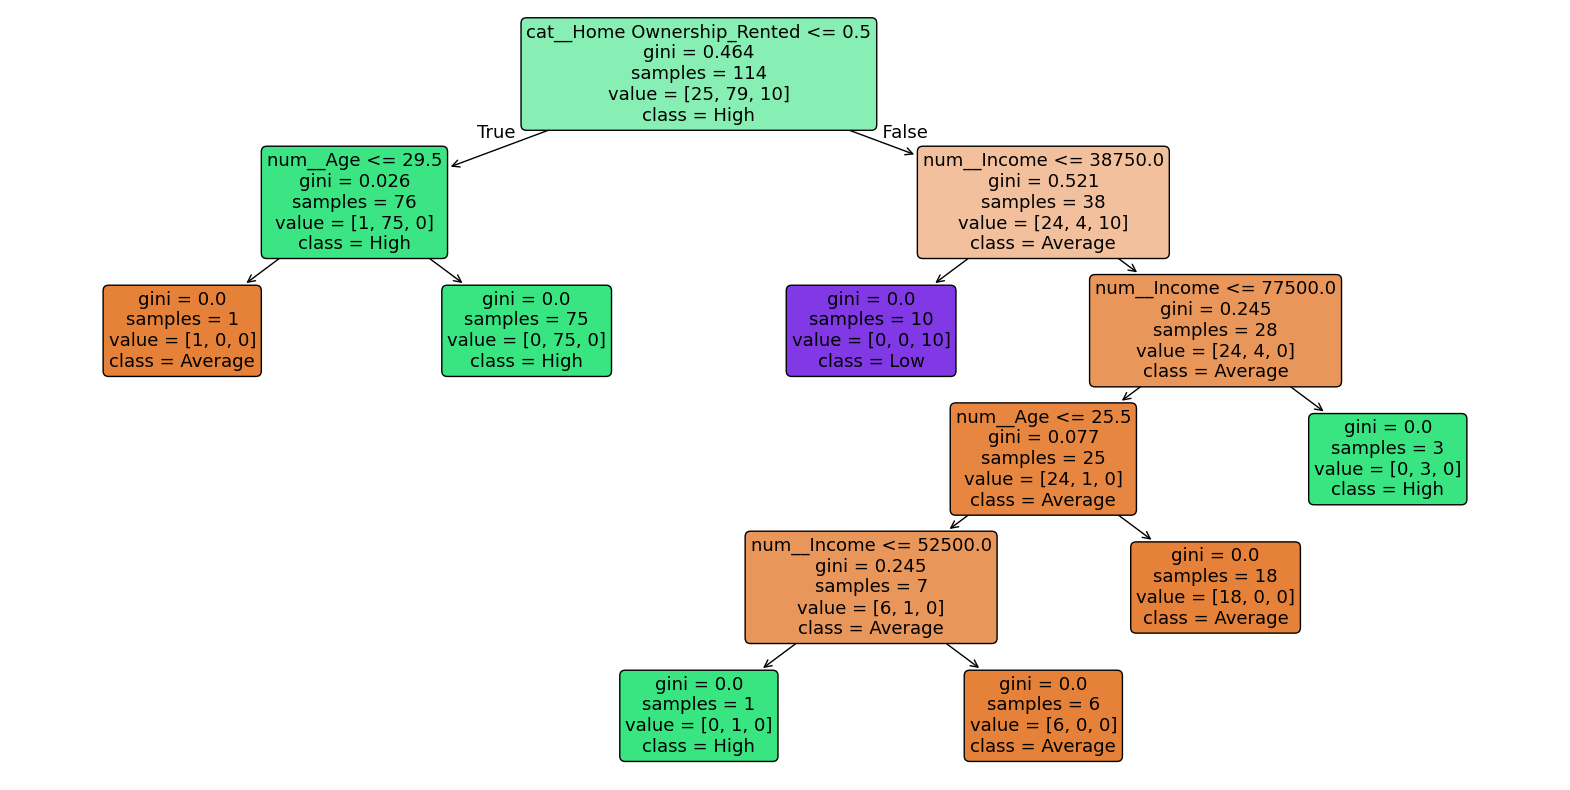

Profundidade da árvore: 5


In [15]:
model = pipe.named_steps["clf"]

plt.figure(figsize=(20,10))
plot_tree(
    model,
    feature_names=pipe.named_steps["prep"].get_feature_names_out(),
    class_names=pipe.named_steps["clf"].classes_,
    filled=True,
    rounded=True,
    fontsize=13
)
plt.show()

print("Profundidade da árvore:", model.get_depth())

# 6) Identifique as 2 principais features do modelo.


In [16]:
importances = model.feature_importances_

feature_names = pipe.named_steps["prep"].get_feature_names_out()

import pandas as pd
feat_importances = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feat_importances.head(2))

                       Feature  Importance
13  cat__Home Ownership_Rented    0.588557
1                  num__Income    0.370240


# 7) Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterior? Justifique.

In [17]:
X_train_reduced = X_train[["Income", "Age"]]
X_test_reduced  = X_test[["Income", "Age"]]

clf_reduced = DecisionTreeClassifier(criterion="gini", random_state=0)
clf_reduced.fit(X_train_reduced, y_train)

y_pred_train_red = clf_reduced.predict(X_train_reduced)
acc_train_red = accuracy_score(y_train, y_pred_train_red)

y_pred_test_red = clf_reduced.predict(X_test_reduced)
acc_test_red = accuracy_score(y_test, y_pred_test_red)

print("Acurácia no treino (2 features):", acc_train_red)
print("Acurácia no teste (2 features):", acc_test_red)

print("\nRelatório no teste:\n", classification_report(y_test, y_pred_test_red))
print("\nMatriz de confusão:\n", confusion_matrix(y_test, y_pred_test_red))

Acurácia no treino (2 features): 1.0
Acurácia no teste (2 features): 1.0

Relatório no teste:
               precision    recall  f1-score   support

     Average       1.00      1.00      1.00        11
        High       1.00      1.00      1.00        34
         Low       1.00      1.00      1.00         5

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50


Matriz de confusão:
 [[11  0  0]
 [ 0 34  0]
 [ 0  0  5]]


# 8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.

    O modelo de Árvore de Decisão apresentou 100% de acurácia no treino, mas caiu no teste, mostrando sinais de overfitting.

    Já o Naive Bayes, apesar de ter uma acurácia um pouco menor no treino, manteve um desempenho mais estável no teste, especialmente quando avaliamos as métricas de recall e F1 nas classes minoritárias (Average e Low).

    Portanto, o Naive Bayes parece ter se adequado melhor aos dados, por ser mais simples, menos sujeito a overfitting e apresentar resultados de avaliação mais equilibrados.